In [76]:
# Libraries
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder


In [5]:
# Data
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
df = pd.read_csv(path)
print(df.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY


# Analisis exploratorio


In [6]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<Axes: xlabel='Drug'>

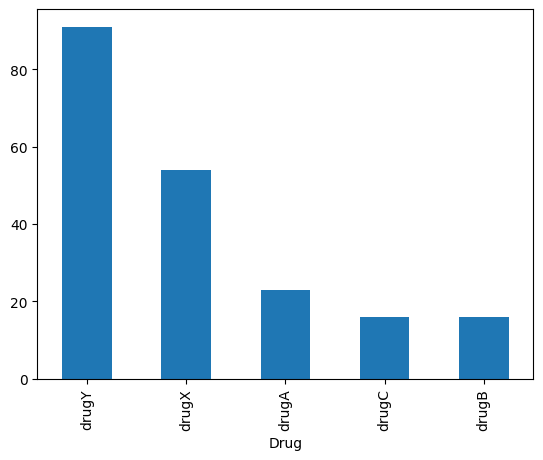

In [8]:
df['Drug'].value_counts().plot(kind='bar')

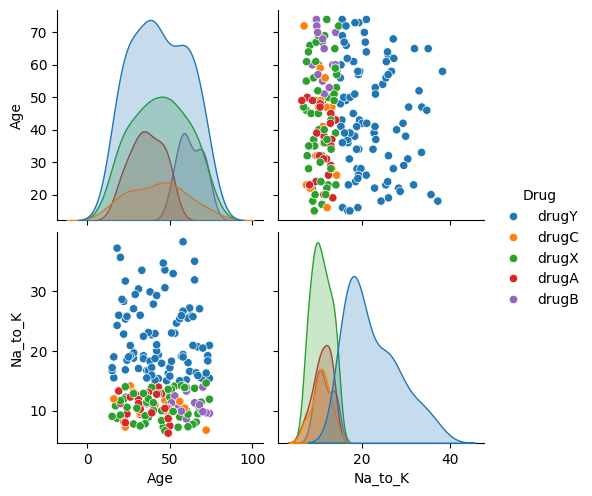

In [10]:
plot = sns.pairplot(df, hue='Drug')

Sex
F    [[Axes(0.125,0.11;0.336957x0.77), Axes(0.56304...
M    [[Axes(0.125,0.11;0.336957x0.77), Axes(0.56304...
dtype: object

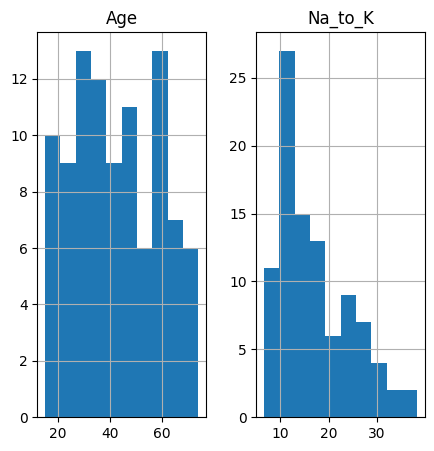

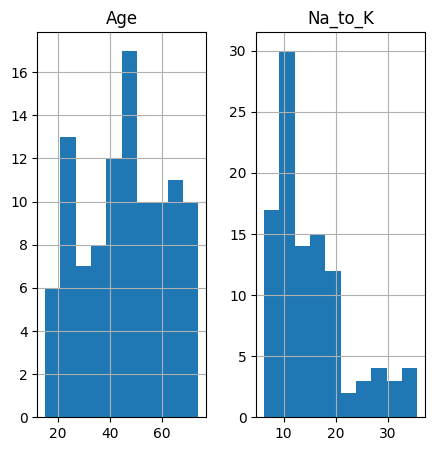

In [ ]:
df[[]]

Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 

<Axes: xlabel='Sex'>

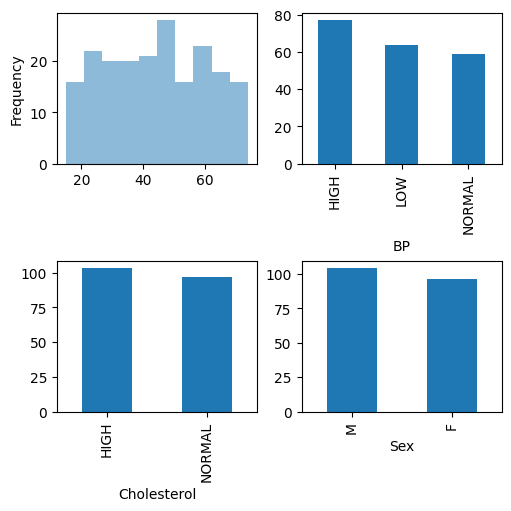

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(5,5), constrained_layout=True)
df['Age'].plot(kind='hist', ax=ax[0,0], bins=10, alpha=0.5)
df['BP'].value_counts().plot(kind='bar', ax=ax[0,1])
df['Cholesterol'].value_counts().plot(kind='bar', ax=ax[1,0])
df['Sex'].value_counts().plot(kind='bar', ax=ax[1,1])


# Preproccesing

In [56]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']


In [57]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


In [77]:
prepro = ColumnTransformer(transformers=[
    ('cat_var', OrdinalEncoder(), ['Sex', 'BP', 'Cholesterol'])
                            ],
     #remainder='passthrough'  # Mantener otras columnas
                            )
                            
prepro

ColumnTransformer(transformers=[('cat_var', OrdinalEncoder(),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [78]:
model = Pipeline(steps=[
                ('Preprocessing', prepro),
                ('Decision_Tree_Model', DecisionTreeClassifier(criterion="entropy", max_depth = 4))
                ])
model  

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('cat_var', OrdinalEncoder(),
                                                  ['Sex', 'BP',
                                                   'Cholesterol'])])),
                ('Decision_Tree_Model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4))])

In [79]:
model.fit(X_train, y_train)

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('cat_var', OrdinalEncoder(),
                                                  ['Sex', 'BP',
                                                   'Cholesterol'])])),
                ('Decision_Tree_Model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4))])

In [80]:
predTree = model.predict(X_test)

In [81]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.5


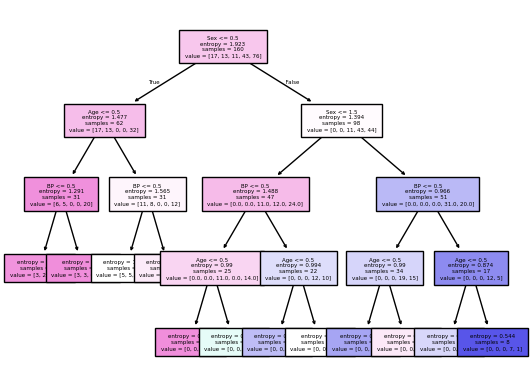

In [89]:
tree_model = model.named_steps['Decision_Tree_Model']
plot_tree(tree_model, filled=True, feature_names=X_train.columns, fontsize=4)
plt.show()